In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('data/measurements.csv')

In [3]:
data.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


In [4]:
data.columns = data.columns.str.lower()
data.columns = data.columns.str.replace(" ","_")
data.shape

(388, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distance       388 non-null    object
 1   consume        388 non-null    object
 2   speed          388 non-null    int64 
 3   temp_inside    376 non-null    object
 4   temp_outside   388 non-null    int64 
 5   specials       93 non-null     object
 6   gas_type       388 non-null    object
 7   ac             388 non-null    int64 
 8   rain           388 non-null    int64 
 9   sun            388 non-null    int64 
 10  refill_liters  13 non-null     object
 11  refill_gas     13 non-null     object
dtypes: int64(5), object(7)
memory usage: 36.5+ KB


In [6]:
def comma_and_num(x):
    x = str(x)
    x = x.replace(',','.')
    x = float(x)
    return x

data['distance'] = data['distance'].apply(comma_and_num)
data['consume'] = data['consume'].apply(comma_and_num)
data['temp_inside'] = data['temp_inside'].apply(comma_and_num)

In [7]:
data.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,ac,rain,sun,refill_liters,refill_gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   distance       388 non-null    float64
 1   consume        388 non-null    float64
 2   speed          388 non-null    int64  
 3   temp_inside    376 non-null    float64
 4   temp_outside   388 non-null    int64  
 5   specials       93 non-null     object 
 6   gas_type       388 non-null    object 
 7   ac             388 non-null    int64  
 8   rain           388 non-null    int64  
 9   sun            388 non-null    int64  
 10  refill_liters  13 non-null     object 
 11  refill_gas     13 non-null     object 
dtypes: float64(3), int64(5), object(4)
memory usage: 36.5+ KB


In [9]:
data.isna().sum()

distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
ac                 0
rain               0
sun                0
refill_liters    375
refill_gas       375
dtype: int64

In [10]:
data[data['temp_inside'].isna()] # not related to AC 
data['specials'].value_counts()

rain                  32
sun                   27
AC rain                9
ac                     8
AC                     6
snow                   3
sun ac                 3
AC snow                1
half rain half sun     1
AC sun                 1
AC Sun                 1
ac rain                1
Name: specials, dtype: int64

In [11]:
# 334 is ac, but ac is 0
# 191 is half rain/sun but sun is 0

data['specials']=data['specials'].str.lower()
data['specials'].value_counts()
data[data['specials'].str.contains('sun')==True]

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,ac,rain,sun,refill_liters,refill_gas
191,43.7,4.7,44,22.0,9,half rain half sun,SP98,0,1,0,10,SP98
219,19.0,4.4,58,22.5,17,sun,SP98,0,0,1,NaN,NaN
239,16.9,4.5,48,22.5,9,sun,E10,0,0,1,NaN,NaN
240,12.4,4.6,55,22.5,11,sun,E10,0,0,1,NaN,NaN
241,17.4,4.4,36,22.5,12,sun,E10,0,0,1,NaN,NaN
248,12.3,5.2,57,22.5,15,sun,E10,0,0,1,NaN,NaN
249,12.5,4.3,57,22.5,16,sun,E10,0,0,1,NaN,NaN
250,31.5,4.1,30,22.5,16,sun,E10,0,0,1,NaN,NaN
253,17.0,3.9,46,22.5,14,sun,E10,0,0,1,NaN,NaN
257,12.4,4.7,55,22.5,14,sun,E10,0,0,1,NaN,NaN


In [12]:
data['specials']=data['specials'].str.replace('sun','')
data['specials']=data['specials'].str.replace('ac','')
data['specials']=data['specials'].str.replace('rain','')
data['specials']=data['specials'].str.replace(' ','')

data.at[334, 'ac'] = 1
data.at[191, 'sun'] = 1
data.at[191, 'specials'] = ''
data['specials'].value_counts()
data['snow'] = np.where(data['specials']=='snow',1,0)
data['snow'].value_counts()
data.specials.value_counts()
data=data.drop('specials',axis=1)
data.head()

,distance,consume,speed,temp_inside,temp_outside,gas_type,ac,rain,sun,refill_liters,refill_gas,snow
0,28.0,5.0,26,21.5,12,E10,0,0,0,45,E10,0
1,12.0,4.2,30,21.5,13,E10,0,0,0,NaN,NaN,0
2,11.2,5.5,38,21.5,15,E10,0,0,0,NaN,NaN,0
3,12.9,3.9,36,21.5,14,E10,0,0,0,NaN,NaN,0
4,18.5,4.5,46,21.5,15,E10,0,0,0,NaN,NaN,0


In [13]:
data['refill_liters']=data['refill_liters'].fillna(0)
data['refill_liters']=data['refill_liters'].apply(comma_and_num)
print(data['refill_liters'].sum())
print(data['consume'].sum())
data['actual_cons'] = data['consume']*data['distance']/100
print(data['actual_cons'].sum())

482.5
1906.0
362.8942


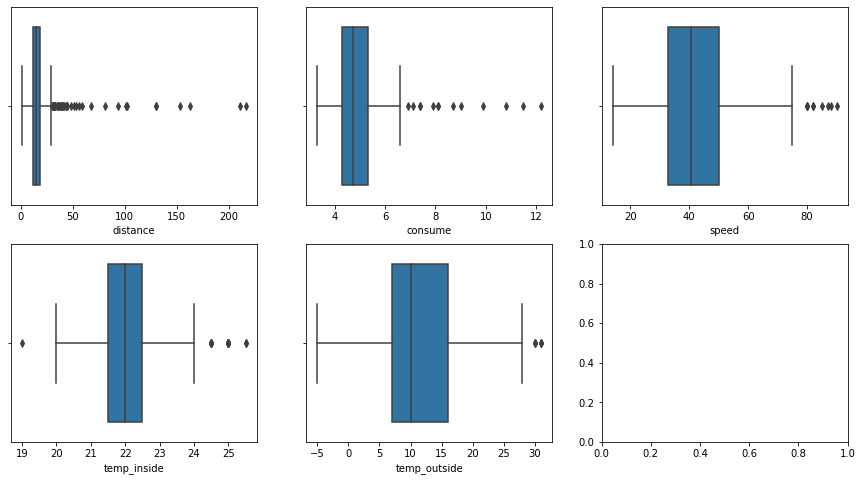

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns 
import math

cols = ['distance','consume','speed','temp_inside','temp_outside']

fig, ax1 = plt.subplots(math.ceil(len(cols)/3),3, figsize=(15,8)) 
for n,col in enumerate(cols):
    sns.boxplot( x=col, data=data, ax=ax1[math.floor(n/3),n%3] )#.set(title=col)
    
#plt.savefig('data/data.png')

plt.show()



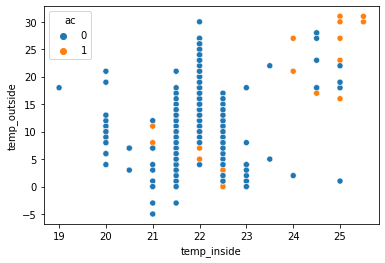

In [19]:
sns.scatterplot( x='temp_inside', y = 'temp_outside', hue = 'ac', data=data)
plt.show()

In [20]:
data.isna().sum()

distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
gas_type           0
ac                 0
rain               0
sun                0
refill_liters      0
refill_gas       375
snow               0
actual_cons        0
dtype: int64

In [21]:
data=data.drop(['refill_gas','refill_liters','actual_cons'],axis=1)
# dropping refill data as we cant reconcile it with the consumption (not all entries are accounted)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   distance      388 non-null    float64
 1   consume       388 non-null    float64
 2   speed         388 non-null    int64  
 3   temp_inside   376 non-null    float64
 4   temp_outside  388 non-null    int64  
 5   gas_type      388 non-null    object 
 6   ac            388 non-null    int64  
 7   rain          388 non-null    int64  
 8   sun           388 non-null    int64  
 9   snow          388 non-null    int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 30.4+ KB


In [22]:
# one-hot encoding the gas type
data['e10'] = np.where(data['gas_type']=='E10',1,0)
data=data.drop('gas_type',axis=1)

In [23]:
avg_temp_inside = data['temp_inside'].mean()
data['temp_inside'] = np.where(data['temp_inside'].isna()==True,avg_temp_inside,data['temp_inside'])

Text(0.5, 0.98, 'Fuel consumption and some inputs')

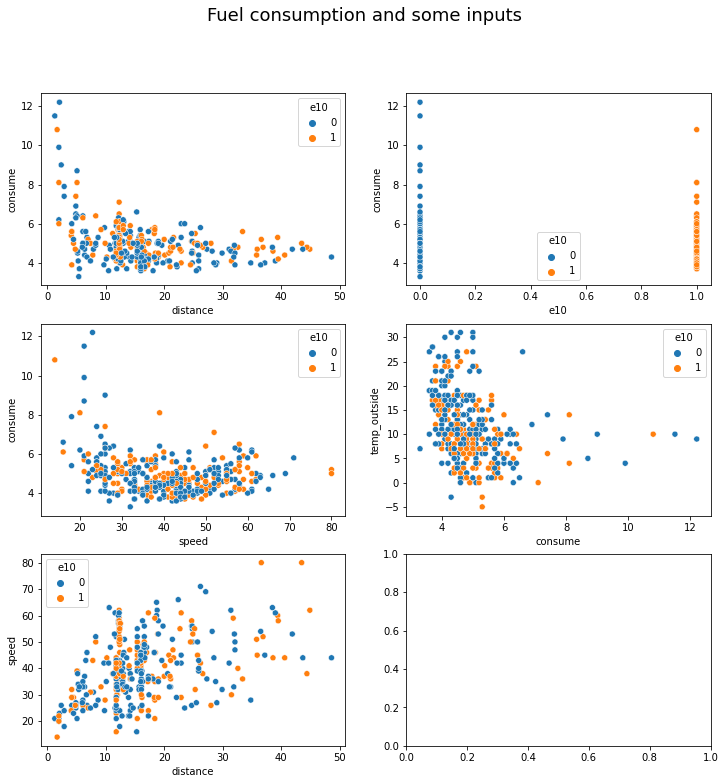

In [35]:
fig, axs = plt.subplots(3, 2, sharex=False, figsize=(12, 12))

sns.scatterplot(ax=axs[0,0], y='consume',x='distance',hue='e10',data=data)
sns.scatterplot(ax=axs[0,1], y='consume',x='e10',hue='e10',data=data)
sns.scatterplot(ax=axs[1,0], y='consume',x='speed',hue='e10',data=data)
sns.scatterplot(ax=axs[1,1], x='consume',y='temp_outside',hue='e10',data=data)
sns.scatterplot(ax=axs[2,0], x='distance',y='speed',hue='e10',data=data)

plt.suptitle('Fuel consumption and some inputs', fontsize=18)



In [32]:
data = data[data['distance']<50] # not enough data points for the distance >50 km

In [ ]:
#classification - > predict type of fuel?
#regression -> split the data and see the regression coefficients? - no, different data, not good
#regression -> not to split the data, what is the wheight of the EC10? - lets go this way 
# also possible to check the values for bins of speed but no time

In [34]:


from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

y = np.log(data['consume'])
X = data.drop('consume',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

LR = linear_model.LinearRegression().fit(X_train,y_train)
y_train_pred = LR.predict(X_train)
y_test_pred = LR.predict(X_test)
print('the intercept:',LR.intercept_.round(2))
print('the coefficients:',LR.coef_.round(2))
print('r2 score for training set:',r2_score(y_train,y_train_pred).round(2))
print('r2 score for test set:',r2_score(y_test,y_test_pred).round(2))

# the result is quite poor, the regression is not predicting well


the intercept: 8.38
the coefficients: [-0.03 -0.02 -0.09 -0.03  0.57  0.56 -0.19 -0.13  0.04]
r2 score for training set: 0.29
r2 score for test set: 0.25


In [36]:
data.drop('consume',axis=1)

,distance,speed,temp_inside,temp_outside,ac,rain,sun,snow,e10
0,28.0,26,21.5,12,0,0,0,0,1
1,12.0,30,21.5,13,0,0,0,0,1
2,11.2,38,21.5,15,0,0,0,0,1
3,12.9,36,21.5,14,0,0,0,0,1
4,18.5,46,21.5,15,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
383,16.0,39,24.5,18,0,0,0,0,0
384,16.1,38,25.0,31,1,0,0,0,0
385,16.0,45,25.0,19,0,0,0,0,0
386,15.4,42,25.0,31,1,0,0,0,0


In [62]:
data['log_distance']=np.log(data['distance'])
data['log_speed']=np.log(data['speed'])
data['log_temp_outside']=np.log(data['temp_outside']+10)

y = (data['consume'])
X = data[['log_speed','log_distance','temp_inside', 'temp_outside', 'ac','rain','sun','snow','e10']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

LR = linear_model.LinearRegression().fit(X_train,y_train)
y_train_pred = LR.predict(X_train)
y_test_pred = LR.predict(X_test)
print('the intercept:',LR.intercept_.round(2))
print('the coefficients:',LR.coef_.round(2))
print('r2 score for training set:',r2_score(y_train,y_train_pred).round(2))
print('r2 score for test set:',r2_score(y_test,y_test_pred).round(2))


# Consumption is not linearly dependent on speed and distance, thus we take log of this variables. 
# The total effect of E10 vs SP98 is positive (ie the consumption is higher for E10) by 0,08 l per 100 km (+2%)

the intercept: 10.48
the coefficients: [-0.52 -0.77 -0.07 -0.03  0.47  0.57 -0.2  -0.14  0.08]
r2 score for training set: 0.42
r2 score for test set: 0.46


In [65]:
0.08/data['consume'].mean()

0.016275771790116734